In [1]:
#Import useful libraries
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
print("FATTO")

FATTO


In [2]:
#load dataset used for analysis
dtypes = {"id":'str',"timestamp":'float',"longitude":'float',"latitude":'float',"annotation":'str', "speed":'float'}
data = pd.read_csv("ais_brest_synopses.csv",usecols=["longitude","latitude","timestamp","id", "annotation", "speed"],dtype=dtypes)

In [3]:
#Counting Base Annotation
annotation_simple_dict = {
    "10000000": 0,
    "01000000": 0,
    "00100000": 0,
    "00010000": 0,
    "00001000": 0,
    "00000100": 0,
    "00000010": 0,
    "00000001": 0
}
#Count type of Annotation
most_frequent=data["annotation"].value_counts()

#Convert to dict
most_dict=most_frequent.to_dict()
list_value = list(most_dict.values())
#Count single annotation
j = 0
for key in most_dict.keys():
    i = 0
    for element in key:
        if element == '1':
            list_key = list(annotation_simple_dict.keys())
            annotation_simple_dict[list_key[i]] += list_value[j]
        i += 1
    j += 1  
annotation_simple_dict

{'10000000': 776041,
 '01000000': 780440,
 '00100000': 3669276,
 '00010000': 96463,
 '00001000': 159126,
 '00000100': 162119,
 '00000010': 372104,
 '00000001': 390809}

In [ ]:
#ANNOTATION BASE
#Counting Annotation base
plt.bar(x=annotation_simple_dict.keys(),height=list(annotation_simple_dict.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("START")
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data.head(5)

In [3]:
dtypes = {"event":'str',"id":'str',"argument":'str',"value":'str',"timestamp1":'int', "timestamp2":'int'}
data_kafka = pd.read_csv("C:\\Users\\emiso\\Desktop\\Situation Awareness\\Data\\Maritime Composite Events\\CEs\\recognised_CEs.csv", usecols=["event","id","argument","value","timestamp1","timestamp2"],dtype=dtypes, sep ='|')

#dtypes = {"event":'str',"id":'float',"argument":'string',"value":'string',"timestamp1":'string', "timestamp2":'string'}
#data_kafka2 = pd.read_csv("C:\\Users\\emiso\\Desktop\\Situation Awareness\\Data\\Maritime Composite Events\\CEs\\recognised_CEs.csv", usecols=["event","id","argument","value","timestamp1","timestamp2"],dtype=dtypes, sep ='|')

In [ ]:

data_kafka_trawling_hour = data_kafka[((data_kafka['event'] == 'trawling') & ((data_kafka['timestamp2'] - data_kafka['timestamp1'])>3200))]

data_kafka_grouped = data_kafka_trawling_hour.groupby(['id']).id.agg('count').to_frame('count')
sum=0

sum=data_kafka_grouped['count'].sum()

print(sum)


In [ ]:
print("START")
data_kafka_oct = data_kafka[((data_kafka['event'] == 'trawling') & (data_kafka['timestamp1']<1446332400))]
data_kafka_oct.head(5)

In [ ]:
data_kafka_grouped_oct = data_kafka_oct.groupby(['id']).id.agg('count').to_frame('count')
sum=0

sum=data_kafka_grouped_oct['count'].sum()
print(sum)

In [ ]:
data_kafka_enzo = data_kafka[((data_kafka['event'] == 'trawling') & (data_kafka['id'] >= 234596000))]

In [25]:
data_analisi = data_kafka[((data_kafka['event'] == 'trawlSpeed') & (data_kafka['id'] == "228109000") & (data_kafka['timestamp1'] >= 1443834944) & (data_kafka['timestamp2'] <= 1443850850))]
data_analisi['data1'] = pd.to_datetime(data_analisi['timestamp1'], unit='s')
data_analisi['data2'] = pd.to_datetime(data_analisi['timestamp2'], unit='s')
data_analisi['day1'] = pd.DatetimeIndex(data_analisi['data1']).day
data_analisi['day2'] = pd.DatetimeIndex(data_analisi['data2']).day
data_analisi['time1'] = pd.DatetimeIndex(data_analisi['data1']).time
data_analisi['time2'] = pd.DatetimeIndex(data_analisi['data2']).time

<ipython-input-25-43653cc78e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analisi['data1'] = pd.to_datetime(data_analisi['timestamp1'], unit='s')
<ipython-input-25-43653cc78e78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analisi['data2'] = pd.to_datetime(data_analisi['timestamp2'], unit='s')
<ipython-input-25-43653cc78e78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

41552   2015-10-03 01:15:44
42501   2015-10-03 02:19:25
43252   2015-10-03 03:01:24
43281   2015-10-03 03:03:13
43435   2015-10-03 03:20:43
45009   2015-10-03 04:52:03
45714   2015-10-03 05:29:52
45720   2015-10-03 05:30:33
45733   2015-10-03 05:31:13
45747   2015-10-03 05:31:42
45750   2015-10-03 05:32:04
45772   2015-10-03 05:32:42
45778   2015-10-03 05:33:04
45833   2015-10-03 05:35:33
45857   2015-10-03 05:37:33
Name: data1, dtype: datetime64[ns]
41552   2015-10-03 02:19:12
42501   2015-10-03 03:01:05
43252   2015-10-03 03:03:00
43281   2015-10-03 03:20:27
43435   2015-10-03 04:51:38
45009   2015-10-03 05:29:33
45714   2015-10-03 05:30:03
45720   2015-10-03 05:30:42
45733   2015-10-03 05:31:23
45747   2015-10-03 05:31:53
45750   2015-10-03 05:32:23
45772   2015-10-03 05:32:53
45778   2015-10-03 05:34:53
45833   2015-10-03 05:37:24
45857   2015-10-03 05:39:24
Name: data2, dtype: datetime64[ns]


<ipython-input-26-575cbab0be43>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


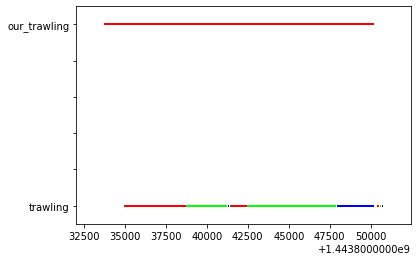

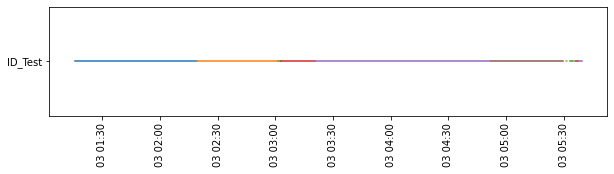

In [26]:
from matplotlib import collections  as mc
import matplotlib.dates as dates
import pylab as pl
import numpy as np


x1 = data_analisi['data1']
x2 = data_analisi['data2']

x11 = '1443833763'
x22 = '1443850172'

list_x1 = data_analisi['timestamp1'].to_list()
list_x2 = data_analisi['timestamp2'].to_list()
lines=[]
for i in range(0, data_analisi['data1'].shape[0]):
    lines.append([(list_x1[i],1),(list_x2[i],1)])

lines2=[[(1443833763,2),(1443850172,2)]]

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
lc2 = mc.LineCollection(lines2, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.add_collection(lc2)
ax.autoscale()
ax.margins(0.1)
labels=['','trawlSpeed','','','','','our_trawlSpeed']
ax.set_yticklabels(labels)


fig, ax = plt.subplots(figsize=(10,2))

print(x1)
print(x2)
#plt.plot([x1,x2],[data_analisi['id'], data_analisi['id']])
y='ID_Test'
y2='ID_test2'
ax.plot([x1,x2],[y,y])
#ax.plot([x11,x22],[y2,y2])

#data_analisi.plot(ax=ax, style='.', x=4, y=1)
#data_analisi.plot(ax=ax, style='.', x=5, y=1)
plt.xticks(rotation=90)
plt.show()

In [22]:
dtypes = {"id":'str',"timestamp":'int64',"longitude":'float',"latitude":'float',"annotation":'str',"speed":'float',"heading":'str',"shiptype":'str'}
data_types = pd.read_csv("ais_data_types.csv",usecols=["id", "timestamp", "longitude","latitude", "annotation","speed","heading","shiptype"],dtype=dtypes)

In [20]:
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]


#intervallo in cui torna al porto, riesce, e fa trawl per meno di un'ora
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443965432000) & (data['timestamp'] <= 1444244942000))]
#quello di sopra + i suoi 60 minuti di pesca
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443965432000) & (data['timestamp'] <= 1444248562000))]

#strisciata lenta in area di pesca
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1444269892000) & (data['timestamp'] <= 1444282242000))]

#no trawl perchè manca change in heading oppure velocità sotto 1.0
#data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445646530000) & (data['timestamp'] <= 1445647931000))]




In [25]:
data_show = data_types[data_types['timestamp'] <= 1446336000000]
data_show.to_csv('trawling_test.csv', index=False, columns=["id", "timestamp", "longitude","latitude", "annotation","speed","heading","shiptype"])

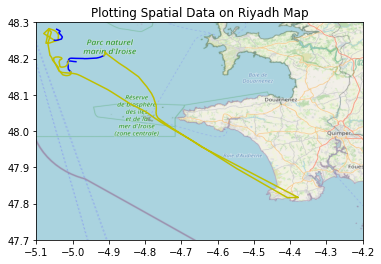

In [35]:
#trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443943662000) & (data['timestamp'] <= 1443947312000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')

fig, ax = plt.subplots()
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)

#intervallo intermedio tra due trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443947312000) & (data['timestamp'] <= 1443959462000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y')

#trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443959462000) & (data['timestamp'] <= 1443965432000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')


#intervallo in cui torna al porto, riesce, e fa trawl per meno di un'ora
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443965432000) & (data['timestamp'] <= 1444244942000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y')



#quello di sopra + i suoi 60 minuti di pesca
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1444244942000) & (data['timestamp'] <= 1444248562000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')

BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')

In [ ]:
data_228109000_trawling = data_show[(data_types['id']  == "228109000")]

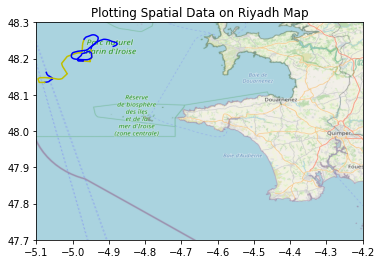

In [46]:
data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

#trawl


#trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443803842000) & (data['timestamp'] <= 1443808042000))]

#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')

fig, ax = plt.subplots()
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)

#intermedio
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443808042000) & (data['timestamp'] <= 1443825542000))]

#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y')


#trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443825542000) & (data['timestamp'] <= 1443830592000))]

#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')


#intermedio
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443830592000) & (data['timestamp'] <= 1443833763000))]

#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y')


#trawl
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1443833763000) & (data['timestamp'] <= 1443850172000))]
#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')


BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')

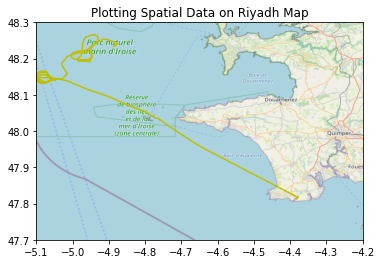

In [42]:

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]

BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')

fig, ax = plt.subplots()
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y')

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)

BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')

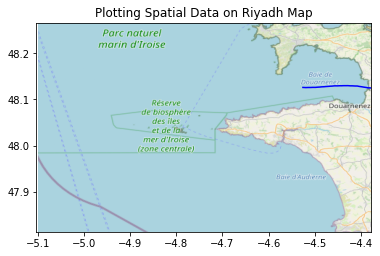

In [79]:
#area di pesca nella baia non riconosciuta dal lavoro

data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

data_show = data[((data['id']  == "228015700")  & (data['timestamp'] >= 1444019098000) & (data['timestamp'] <= 1444023086000))]

ruh_m = plt.imread('map_from_start_extended.png')

fig, ax = plt.subplots()
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b')

ax.set_title('Plotting Spatial Data on Riyadh Map')


BBox2=((-5.1,-4.2,47.7,48.3))
#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('test.png')


In [84]:
data_show = data_kafka[((data_kafka['id']  == "228109000") & (data_kafka['timestamp2']-data_kafka['timestamp1']<3000))]

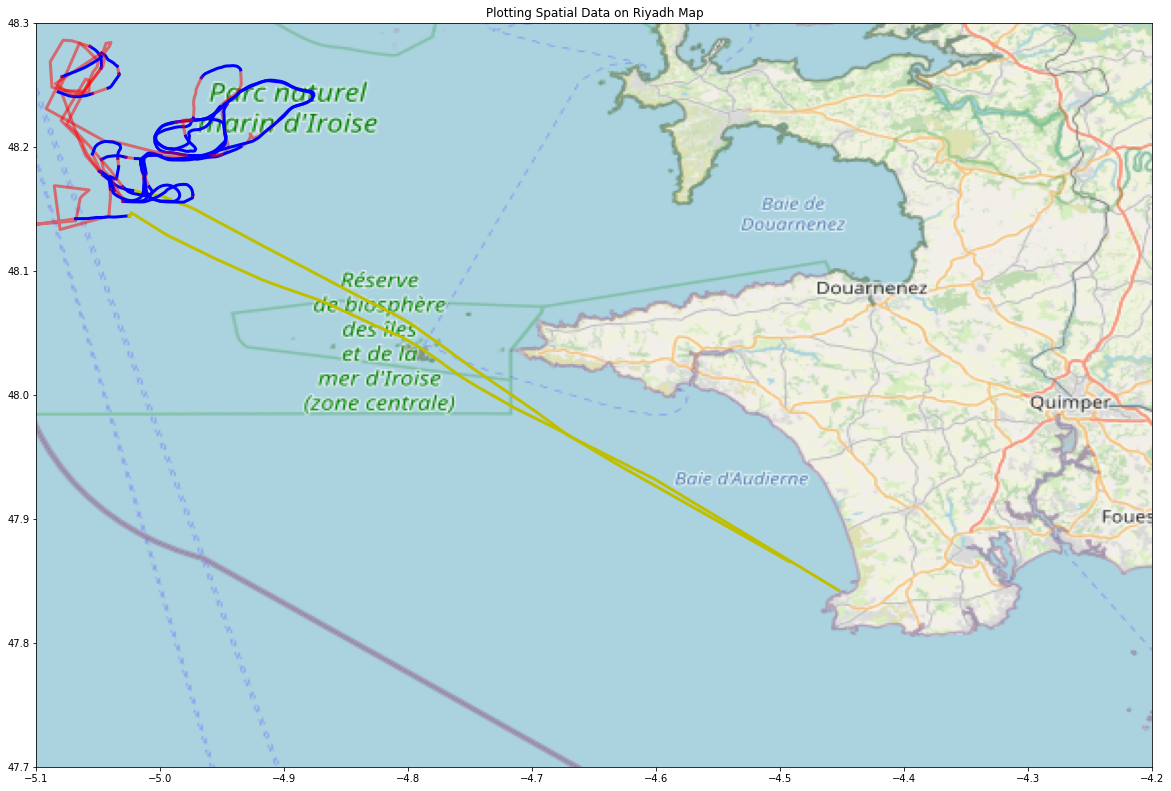

In [27]:
data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')
fig, ax = plt.subplots(figsize=(20,25))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
t = False
data_traj['diff1'] = 0
data_traj['diff2'] = 0
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445493329000) & (data['timestamp'] <= 1445593999000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)
for index, row in data_traj.iterrows():
    if index < len(data_traj)-1:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['stop']) & (data['timestamp'] <= data_traj['start'][index+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445793249000) & (data['timestamp'] <= 1445855534000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228109000_complete.png')

<ipython-input-25-e4e6177b96b7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
<ipython-input-25-e4e6177b96b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)


0
1
2
3
4
5
6
7
8
9
10
11
12


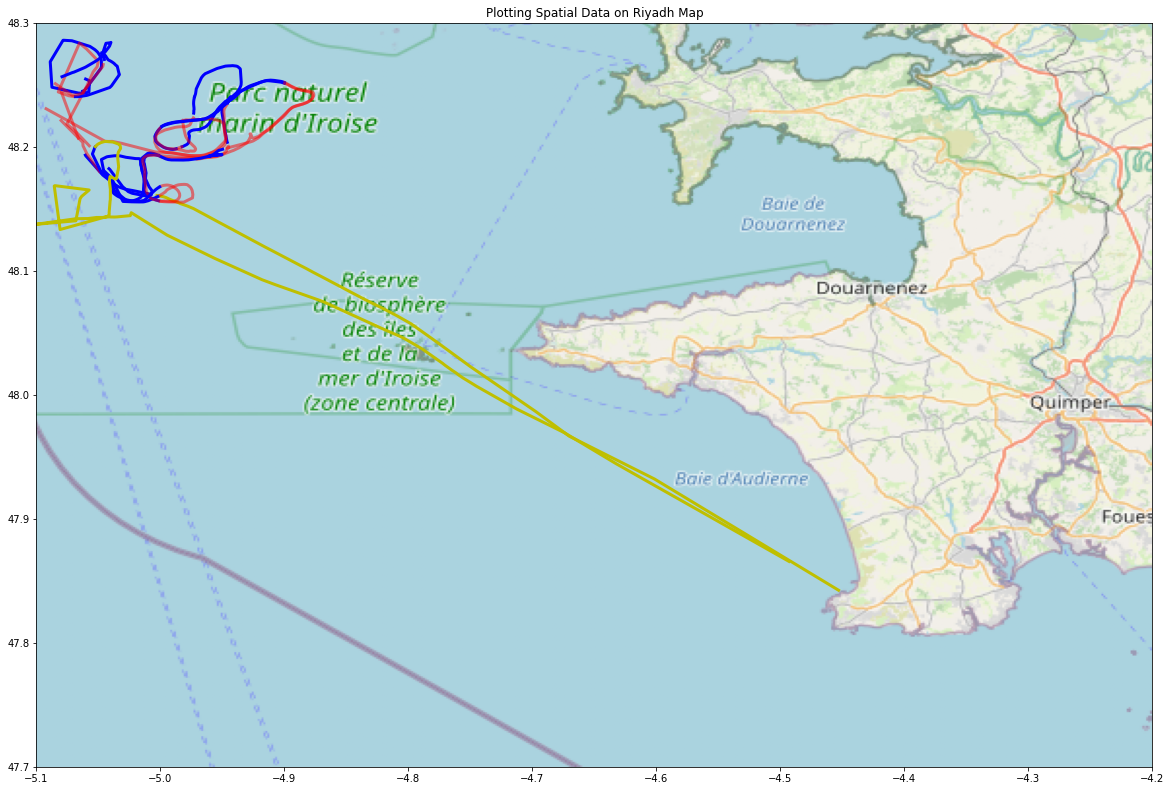

In [25]:
data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')
fig, ax = plt.subplots(figsize=(20,25))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
#data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
data_traj = data_kafka[((data_kafka['id']=="228109000") & (data_kafka['event']=="trawling") & (data_kafka['timestamp1']>=1445493329) & (data_kafka['timestamp2']<=1445855534))]
#data_traj.to_csv('traj_228109000_search.csv')
data_traj['timestamp1'] = data_traj['timestamp1'].apply(lambda x: x*1000)
data_traj['timestamp2'] = data_traj['timestamp2'].apply(lambda x: x*1000)
data_traj.reset_index(inplace=True)
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445493329000) & (data['timestamp'] <= 1445592951000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)

for i, row in data_traj.iterrows():
    if i < len(data_traj)-1:
        print(i)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp2']) & (data['timestamp'] <= data_traj['timestamp1'][i+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        #data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        #data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['timestamp1']) & (data['timestamp'] <= row['timestamp2']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
    
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445767084000) & (data['timestamp'] <= 1445855534000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('test2.png')

In [ ]:
data_show = data[((data['id']  == "228109000") & (data['timestamp'] <= 1443850172000))]
BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))
ruh_m = plt.imread('map_from_start_extended.png')
fig, ax = plt.subplots(figsize=(20,25))
#trawl
dtypes = {"start":'int64',"stop":'int64'}
data_traj = pd.read_csv('traj_228109000.csv', sep=',', usecols = ['start','stop'], dtype=dtypes, header=0)
t = False
data_traj['diff1'] = 0
data_traj['diff2'] = 0
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445493329000) & (data['timestamp'] <= 1445593999000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)
for index, row in data_traj.iterrows():
    if index < len(data_traj)-1:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['stop']) & (data['timestamp'] <= data_traj['start'][index+1]))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=0.5, c='r', linewidth=3)
        data_traj['diff1'][index] = (row['stop'] - row['start'])/(60*1000)
        data_traj['diff2'][index] = (data_traj['start'][index+1] - row['stop'])/(60*1000)
        #t=True
    else:
        data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= row['start']) & (data['timestamp'] <= row['stop']))]
        ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='b', linewidth=3)        
        #t=False
data_show = data[((data['id']  == "228109000") & (data['timestamp'] >= 1445793249000) & (data['timestamp'] <= 1445855534000))]
ax.plot(data_show.longitude,data_show.latitude, zorder=1, alpha=1, c='y', linewidth=3)


#BBox = ((data_show.longitude.min(), data_show.longitude.max(), data_show.latitude.min(), data_show.latitude.max()))

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(-5.1,-4.2)
ax.set_ylim(47.7,48.3)




BBox2=((-5.1,-4.2,47.7,48.3))
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox2, aspect= 'equal')
plt.savefig('228109000_complete.png')


x11 = '1443833763'
x22 = '1443850172'

list_x1 = data_analisi['timestamp1'].to_list()
list_x2 = data_analisi['timestamp2'].to_list()
lines=[]
for i in range(0, data_analisi['data1'].shape[0]):
    lines.append([(list_x1[i],1),(list_x2[i],1)])

lines2=[[(1443833763,2),(1443850172,2)]]

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
lc2 = mc.LineCollection(lines2, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.add_collection(lc2)
ax.autoscale()
ax.margins(0.1)
labels=['','trawlSpeed','','','','','our_trawlSpeed']
ax.set_yticklabels(labels)

fig, ax = plt.subplots(figsize=(10,2))

print(x1)
print(x2)
#plt.plot([x1,x2],[data_analisi['id'], data_analisi['id']])
y='ID_Test'
y2='ID_test2'
ax.plot([x1,x2],[y,y])